<a href="https://colab.research.google.com/github/rahmadr2612/AnalisaKankerPayudara/blob/main/Analisa_Kanker_Payudara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
data = pd.read_csv(url,header=None)

data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
data.columns = ['ID', 'Class', 'fitur 2', 'fitur 3', 'fitur 4', 'fitur 5', 'fitur 6', 'fitur 7', 'fitur 8', 'fitur 9',
              'fitur 10', 'fitur 11', 'fitur 12', 'fitur 13', 'fitur 14', 'fitur 15', 'fitur 16', 'fitur 17', 'fitur 18', 'fitur 19',
              'fitur 20', 'fitur 21', 'fitur 22', 'fitur 23', 'fitur 24', 'fitur 25', 'fitur 26', 'fitur 27', 'fitur 28', 'fitur 29',
              'fitur 30', 'fitur 31']
data

,ID,Class,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,...,fitur 22,fitur 23,fitur 24,fitur 25,fitur 26,fitur 27,fitur 28,fitur 29,fitur 30,fitur 31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        569 non-null    int64  
 1   Class     569 non-null    object 
 2   fitur 2   569 non-null    float64
 3   fitur 3   569 non-null    float64
 4   fitur 4   569 non-null    float64
 5   fitur 5   569 non-null    float64
 6   fitur 6   569 non-null    float64
 7   fitur 7   569 non-null    float64
 8   fitur 8   569 non-null    float64
 9   fitur 9   569 non-null    float64
 10  fitur 10  569 non-null    float64
 11  fitur 11  569 non-null    float64
 12  fitur 12  569 non-null    float64
 13  fitur 13  569 non-null    float64
 14  fitur 14  569 non-null    float64
 15  fitur 15  569 non-null    float64
 16  fitur 16  569 non-null    float64
 17  fitur 17  569 non-null    float64
 18  fitur 18  569 non-null    float64
 19  fitur 19  569 non-null    float64
 20  fitur 20  569 non-null    float6

In [ ]:
data['Class'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
data['Class'].value_counts()

B    357
M    212
Name: Class, dtype: int64

Text(0.5, 1.02, 'Distribusi Penderita Penyakit Kanker Paru-Paru')

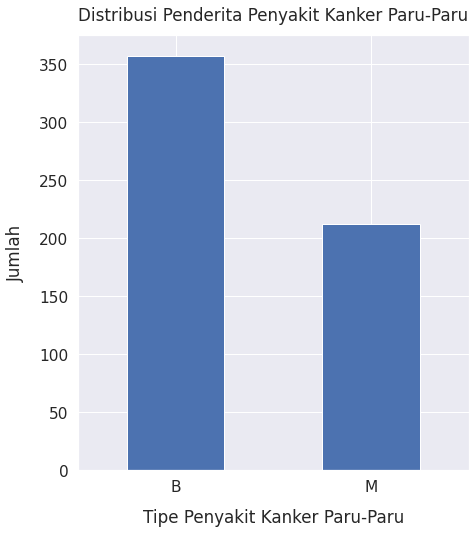

In [ ]:
sns.set(font_scale=1.4)
data['Class'].value_counts().plot(kind='bar', figsize=(7,8), rot=0)
plt.xlabel("Tipe Penyakit Kanker Paru-Paru", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Penderita Penyakit Kanker Paru-Paru", y=1.02)

In [ ]:
data.describe()

,ID,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,fitur 10,...,fitur 22,fitur 23,fitur 24,fitur 25,fitur 26,fitur 27,fitur 28,fitur 29,fitur 30,fitur 31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data.replace("?", np.nan, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        569 non-null    int64  
 1   Class     569 non-null    object 
 2   fitur 2   569 non-null    float64
 3   fitur 3   569 non-null    float64
 4   fitur 4   569 non-null    float64
 5   fitur 5   569 non-null    float64
 6   fitur 6   569 non-null    float64
 7   fitur 7   569 non-null    float64
 8   fitur 8   569 non-null    float64
 9   fitur 9   569 non-null    float64
 10  fitur 10  569 non-null    float64
 11  fitur 11  569 non-null    float64
 12  fitur 12  569 non-null    float64
 13  fitur 13  569 non-null    float64
 14  fitur 14  569 non-null    float64
 15  fitur 15  569 non-null    float64
 16  fitur 16  569 non-null    float64
 17  fitur 17  569 non-null    float64
 18  fitur 18  569 non-null    float64
 19  fitur 19  569 non-null    float64
 20  fitur 20  569 non-null    float6

In [ ]:
data.isnull().values.any()

False

In [ ]:
data.loc[:, data.isnull().any()].columns

Index([], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        569 non-null    int64  
 1   Class     569 non-null    object 
 2   fitur 2   569 non-null    float64
 3   fitur 3   569 non-null    float64
 4   fitur 4   569 non-null    float64
 5   fitur 5   569 non-null    float64
 6   fitur 6   569 non-null    float64
 7   fitur 7   569 non-null    float64
 8   fitur 8   569 non-null    float64
 9   fitur 9   569 non-null    float64
 10  fitur 10  569 non-null    float64
 11  fitur 11  569 non-null    float64
 12  fitur 12  569 non-null    float64
 13  fitur 13  569 non-null    float64
 14  fitur 14  569 non-null    float64
 15  fitur 15  569 non-null    float64
 16  fitur 16  569 non-null    float64
 17  fitur 17  569 non-null    float64
 18  fitur 18  569 non-null    float64
 19  fitur 19  569 non-null    float64
 20  fitur 20  569 non-null    float6

In [ ]:
x = data.iloc[:,2:32]
y = data['Class']

In [ ]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: Class, dtype: object

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=2022)

In [ ]:
x_train.head()

,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,fitur 10,fitur 11,...,fitur 22,fitur 23,fitur 24,fitur 25,fitur 26,fitur 27,fitur 28,fitur 29,fitur 30,fitur 31
479,16.25,19.51,109.80,815.8,0.10260,0.18930,0.223600,0.091940,0.2151,0.06578,...,17.39,23.05,122.10,939.7,0.1377,0.44620,0.58970,0.17750,0.3318,0.09136
209,15.27,12.91,98.17,725.5,0.08182,0.06230,0.058920,0.031570,0.1359,0.05526,...,17.38,15.92,113.70,932.7,0.1222,0.21860,0.29620,0.10350,0.2320,0.07474
408,17.99,20.66,117.80,991.7,0.10360,0.13040,0.120100,0.088240,0.1992,0.06069,...,21.08,25.41,138.10,1349.0,0.1482,0.37350,0.33010,0.19740,0.3060,0.08503
522,11.26,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,0.1637,0.06343,...,11.93,26.43,76.38,435.9,0.1108,0.07723,0.02533,0.02832,0.2557,0.07613
372,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.193200,0.125500,0.1973,0.06183,...,22.69,21.84,152.10,1535.0,0.1192,0.28400,0.40240,0.19660,0.2730,0.08666


In [ ]:
x_norm = StandardScaler().fit_transform(x)

In [ ]:
x_norm

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x_norm,y, test_size=0.3, random_state=2022)

In [ ]:
pca = PCA(random_state=2022)
pca.fit(x)
ori_pca_array = pca.transform(x)
ori_pca = pd.DataFrame(ori_pca_array)
print("Heads of Original_PCA:",ori_pca.head())
var_ratio = pca.explained_variance_ratio_
print("\n Explained Variance Ratio:",var_ratio)
sv = pca.singular_values_
print("\n Singular Value:" ,sv)

Heads of Original_PCA:             0           1          2          3          4         5   \
0  1160.142574 -293.917544  48.578398  -8.711975  32.000486  1.265415   
1  1269.122443   15.630182 -35.394534  17.861283  -4.334874 -0.225872   
2   995.793889   39.156743  -1.709753   4.199340  -0.466529 -2.652811   
3  -407.180803  -67.380320   8.672848 -11.759867   7.115461  1.299436   
4   930.341180  189.340742   1.374801   8.499183   7.613289  1.021160   

         6         7         8         9   ...        20        21        22  \
0  0.931337  0.148167  0.745463  0.589359  ...  0.021189  0.000241  0.002528   
1 -0.046037  0.200804 -0.485828 -0.084035  ...  0.005237  0.021069  0.001565   
2 -0.779745 -0.274026 -0.173874 -0.186994  ... -0.009865 -0.002394 -0.004125   
3 -1.267304 -0.060555 -0.330639 -0.144155  ...  0.011169  0.007063  0.001537   
4 -0.335522  0.289109  0.036087 -0.138502  ... -0.009916  0.010269  0.002204   

         23        24        25        26        27      

In [ ]:
cum_var_ratio = np.cumsum(var_ratio)

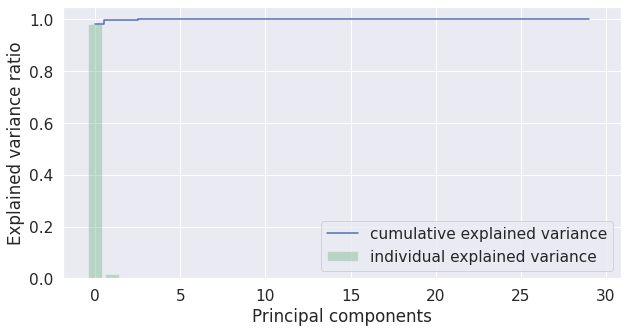

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)),
          var_ratio,
          alpha=0.3333,
          align='center',
          label='individual explained variance',
          color = 'g')
plt.step(range(len(cum_var_ratio)),
          cum_var_ratio,
          where='mid',
          label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [ ]:
print("Cumulative explained ratio:",cum_var_ratio)

Cumulative explained ratio: [0.98204467 0.99822116 0.99977867 0.9998996  0.99998788 0.99999453
 0.99999854 0.99999936 0.99999971 0.99999989 0.99999996 0.99999998
 0.99999999 0.99999999 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [ ]:
pca = PCA(n_components=27, random_state=2022)
pca.fit(x)
ori_pca_array = pca.transform(x)
ori_pca = pd.DataFrame(data=ori_pca_array, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC124','PC25','PC26','PC27'])

In [ ]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(ori_pca,y, test_size=0.3, random_state=2022)

In [ ]:
pca = PCA(random_state=2022)
pca.fit(x_norm)
norm_pca_array = pca.transform(x_norm)
norm_pca = pd.DataFrame(norm_pca_array)
print("Heads of iris_pca:",norm_pca.head())
var_ratio = pca.explained_variance_ratio_
print("\n Explained variance ratio:",var_ratio)
sv = pca.singular_values_
print("\n Singular Value:",sv)

Heads of iris_pca:          0          1         2         3         4         5         6   \
0  9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411424  2.159370   
1  2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028656  0.013358   
2  5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541452 -0.668166   
3  7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053422  1.429911   
4  3.935302  -1.948072  1.389767  2.940639  0.546747 -1.226495 -0.936213   

         7         8         9   ...        20        21        22        23  \
0 -0.398407 -0.157118 -0.877402  ...  0.096515  0.068850  0.084519 -0.175256   
1  0.240988 -0.711905  1.106995  ... -0.077327 -0.094578 -0.217718  0.011290   
2  0.097374  0.024066  0.454275  ...  0.311067 -0.060309 -0.074291  0.102762   
3  1.059565 -1.405440 -1.116975  ...  0.434193 -0.203266 -0.124105  0.153430   
4  0.636376 -0.263805  0.377704  ... -0.116545 -0.017650  0.139454 -0.005332   

         24        25        26        27  

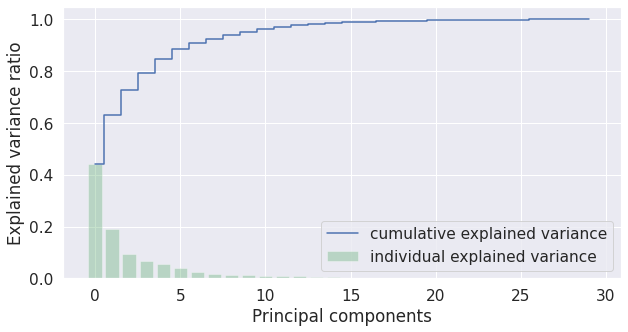

Cumulative explained ratio: [0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


In [ ]:
cum_var_ratio = np.cumsum(var_ratio)
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)),
var_ratio,
alpha=0.3333,
align='center',
label='individual explained variance',
color = 'g')
plt.step(range(len(cum_var_ratio)),
cum_var_ratio,
where='mid',
label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()
print("Cumulative explained ratio:",cum_var_ratio)

In [ ]:
pca = PCA(n_components=27, random_state=2022)
pca.fit(x_norm)
norm_pca_array = pca.transform(x_norm)
norm_pca = pd.DataFrame(data=norm_pca_array, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC124','PC25','PC26','PC27'])
X_train_norm_pca, X_test_norm_pca, Y_train_norm_pca, Y_test_norm_pca = train_test_split(norm_pca,y, test_size=0.3, random_state=2022)

In [ ]:
parameters_dt = {
"model__max_depth": np.arange(1,21),
"model__min_samples_leaf": np.arange(1,101,2),
"model__min_samples_split": np.arange(2,11),
"model__criterion": ['gini','entropy'],
"model__random_state": [2022]
}

In [ ]:
classifier_dt_pipeline = Pipeline([
('model',DecisionTreeClassifier()),
])

In [ ]:
ori_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)
ori_classifier_dt.fit(x_train,y_train.ravel())
ori_classifier_dt.best_estimator_
for param_name in sorted(parameters_dt.keys()):
  print('%s: %r' %(param_name,ori_classifier_dt.best_params_[param_name]))

model__criterion: 'entropy'
model__max_depth: 3
model__min_samples_leaf: 3
model__min_samples_split: 2
model__random_state: 2022


In [ ]:
norm_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)
norm_classifier_dt.fit(x_train_norm,y_train_norm.ravel())
norm_classifier_dt.best_estimator_
for param_name in sorted(parameters_dt.keys()):
  print('%s: %r' %(param_name,norm_classifier_dt.best_params_[param_name]))


model__criterion: 'entropy'
model__max_depth: 3
model__min_samples_leaf: 3
model__min_samples_split: 2
model__random_state: 2022


In [ ]:
ori_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)
ori_pca_classifier_dt.fit(X_train_pca,Y_train_pca.ravel())
ori_pca_classifier_dt.best_estimator_
for param_name in sorted(parameters_dt.keys()):
  print('%s: %r' %(param_name,ori_pca_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 3
model__min_samples_leaf: 5
model__min_samples_split: 2
model__random_state: 2022


In [ ]:
norm_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)
norm_pca_classifier_dt.fit(X_train_norm_pca,Y_train_norm_pca.ravel())
norm_pca_classifier_dt.best_estimator_
for param_name in sorted(parameters_dt.keys()):
  print('%s: %r' %(param_name,norm_pca_classifier_dt.best_params_[param_name]))


model__criterion: 'entropy'
model__max_depth: 6
model__min_samples_leaf: 1
model__min_samples_split: 7
model__random_state: 2022


In [ ]:
ori_y_pred_dt_train = ori_classifier_dt.predict(x_train)
ori_accuracy_dt_train = accuracy_score(y_train,ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)
ori_precision_dt_train = precision_score(y_train,ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)
ori_recall_dt_train = recall_score(y_train,ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)
ori_y_pred_dt_test = ori_classifier_dt.predict(x_test)
ori_accuracy_dt_test = accuracy_score(y_test,ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)
ori_precision_dt_test = precision_score(y_test,ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)
ori_recall_dt_test = recall_score(y_test,ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)

Akurasi pada training set:  0.9748743718592965
Precision pada training set:  0.9748743718592965
Recall pada training set:  0.9748743718592965
Akurasi pada test set:  0.9181286549707602
Precision pada test set:  0.9181286549707602
Recall pada test set:  0.9181286549707602


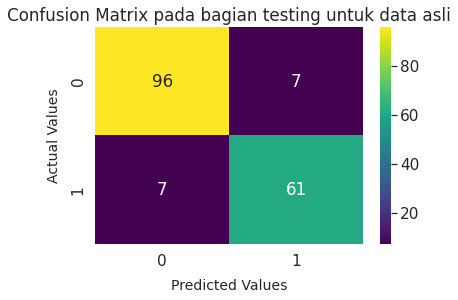

In [ ]:
sns.heatmap(confusion_matrix(y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

In [ ]:
norm_y_pred_dt_train = norm_classifier_dt.predict(x_train_norm)
norm_accuracy_dt_train = accuracy_score(y_train_norm,norm_y_pred_dt_train)
print('Akurasi pada training set: ', norm_accuracy_dt_train)
norm_precision_dt_train = precision_score(y_train_norm,norm_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_precision_dt_train)
norm_recall_dt_train = recall_score(y_train_norm,norm_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_recall_dt_train)
norm_y_pred_dt_test = norm_classifier_dt.predict(x_test_norm)
norm_accuracy_dt_test = accuracy_score(y_test_norm,norm_y_pred_dt_test)
print('Akurasi pada test set: ', norm_accuracy_dt_test)
norm_precision_dt_test = precision_score(y_test_norm,norm_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_precision_dt_test)
norm_recall_dt_test = recall_score(y_test_norm,norm_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_recall_dt_test)

Akurasi pada training set:  0.9748743718592965
Precision pada training set:  0.9748743718592965
Recall pada training set:  0.9748743718592965
Akurasi pada test set:  0.9181286549707602
Precision pada test set:  0.9181286549707602
Recall pada test set:  0.9181286549707602


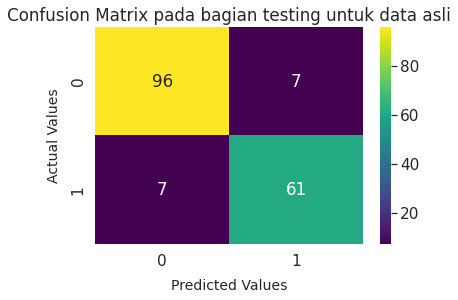

In [ ]:
sns.heatmap(confusion_matrix(y_test_norm,norm_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

In [ ]:
ori_pca_y_pred_dt_train = ori_pca_classifier_dt.predict(X_train_pca)
ori_pca_accuracy_dt_train = accuracy_score(Y_train_pca,ori_pca_y_pred_dt_train)
print('Akurasi pada training set: ', ori_pca_accuracy_dt_train)
ori_pca_precision_dt_train = precision_score(Y_train_pca,ori_pca_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_pca_precision_dt_train)
ori_pca_recall_dt_train = recall_score(Y_train_pca,ori_pca_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_pca_recall_dt_train)
ori_pca_y_pred_dt_test = ori_pca_classifier_dt.predict(X_test_pca)
ori_pca_accuracy_dt_test = accuracy_score(Y_test_pca,ori_pca_y_pred_dt_test)
print('Akurasi pada test set: ', ori_pca_accuracy_dt_test)
ori_pca_precision_dt_test = precision_score(Y_test_pca,ori_pca_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_pca_precision_dt_test)
ori_pca_recall_dt_test = recall_score(Y_test_pca,ori_pca_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_pca_recall_dt_test)

Akurasi pada training set:  0.964824120603015
Precision pada training set:  0.964824120603015
Recall pada training set:  0.964824120603015
Akurasi pada test set:  0.9239766081871345
Precision pada test set:  0.9239766081871345
Recall pada test set:  0.9239766081871345


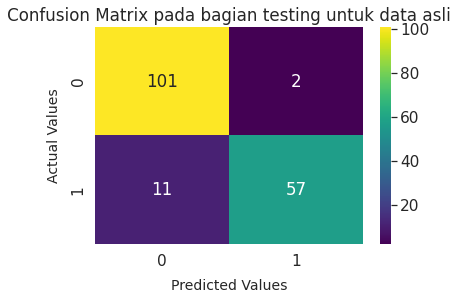

In [ ]:
sns.heatmap(confusion_matrix(Y_test_pca,ori_pca_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

In [ ]:
norm_pca_y_pred_dt_train = norm_pca_classifier_dt.predict(X_train_norm_pca)
norm_pca_accuracy_dt_train = accuracy_score(Y_train_norm_pca,norm_pca_y_pred_dt_train)
print('Akurasi pada training set: ', norm_pca_accuracy_dt_train)
norm_pca_precision_dt_train = precision_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_pca_precision_dt_train)
norm_pca_recall_dt_train = recall_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_pca_recall_dt_train)
norm_pca_y_pred_dt_test = norm_pca_classifier_dt.predict(X_test_norm_pca)
norm_pca_accuracy_dt_test = accuracy_score(Y_test_norm_pca,norm_pca_y_pred_dt_test)
print('Akurasi pada test set: ', norm_pca_accuracy_dt_test)
norm_pca_precision_dt_test = precision_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_pca_precision_dt_test)
norm_pca_recall_dt_test = recall_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_pca_recall_dt_test)


Akurasi pada training set:  0.9824120603015075
Precision pada training set:  0.9824120603015075
Recall pada training set:  0.9824120603015075
Akurasi pada test set:  0.9649122807017544
Precision pada test set:  0.9649122807017544
Recall pada test set:  0.9649122807017544


In [ ]:
models = [
('Decision Tree Data Original', ori_accuracy_dt_train, ori_accuracy_dt_test),
('Decision Tree Data Normalisasi', norm_accuracy_dt_train, norm_accuracy_dt_test),
('Decision Tree PCA Data Original', ori_pca_accuracy_dt_train, ori_pca_accuracy_dt_test),
('Decision Tree PCA Data Normalisasi', norm_pca_accuracy_dt_train, norm_pca_accuracy_dt_test),
]
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Decision Tree Data Original,0.974874,0.918129
1,Decision Tree Data Normalisasi,0.974874,0.918129
2,Decision Tree PCA Data Original,0.964824,0.923977
3,Decision Tree PCA Data Normalisasi,0.982412,0.964912


In [ ]:
models_comparison = [
('Decision Tree Data Original', ori_accuracy_dt_test, ori_recall_dt_test, ori_precision_dt_test),
('Decision Tree Data Normalisasi', norm_accuracy_dt_test, norm_recall_dt_test, norm_precision_dt_test),
('Decision Tree PCA Data Original', ori_pca_accuracy_dt_test, ori_pca_recall_dt_test, ori_pca_precision_dt_test),
('Decision Tree PCA Data Normalisasi', norm_pca_accuracy_dt_test, norm_pca_recall_dt_test, norm_pca_precision_dt_test),
]
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Decision Tree Data Original,0.918129,0.918129,0.918129
1,Decision Tree Data Normalisasi,0.918129,0.918129,0.918129
2,Decision Tree PCA Data Original,0.923977,0.923977,0.923977
3,Decision Tree PCA Data Normalisasi,0.964912,0.964912,0.964912


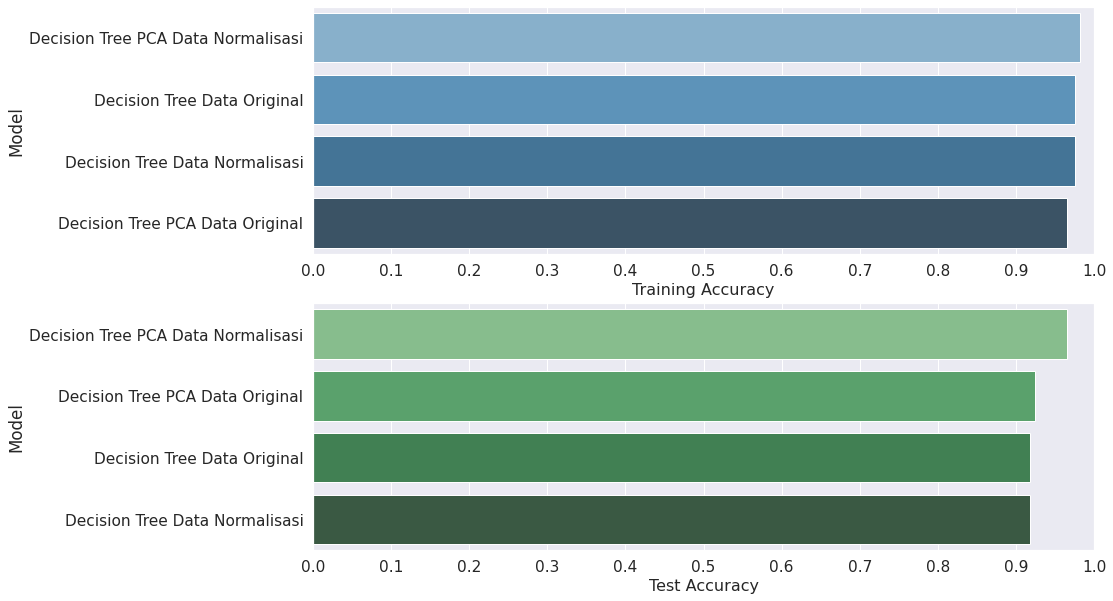

In [ ]:
f, axes = plt.subplots(2,1, figsize=(14,10))
predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)
sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))
predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)
sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))
plt.show()